In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from datetime import datetime

In [2]:
# reference: https://www.kaggle.com/rahuly93/medicare-provider-fraud-detection

In [3]:
df = pd.DataFrame({"A":[1,2,3], "B":[4,5,6]})
df
df[df.index >= df.index[1]]

,A,B
1,2,5
2,3,6


In [4]:
# Load Train Dataset
root_dir = "./archive"
Train=pd.read_csv(root_dir + "/Train.csv")
Train_Beneficiarydata=pd.read_csv(root_dir + "/Train_Beneficiarydata.csv")
Train_Inpatientdata=pd.read_csv(root_dir + "/Train_Inpatientdata.csv")
Train_Outpatientdata=pd.read_csv(root_dir + "/Train_Outpatientdata.csv")

# Load Test Dataset

Test=pd.read_csv(root_dir + "/Test.csv")
Test_Beneficiarydata=pd.read_csv(root_dir + "/Test_Beneficiarydata.csv")
Test_Inpatientdata=pd.read_csv(root_dir + "/Test_Inpatientdata.csv")
Test_Outpatientdata=pd.read_csv(root_dir + "/Test_Outpatientdata.csv")

In [5]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


<b>Observation : </b>

We have 5410 datapoints. Using other two datasets inpatient and outpatient we need to generate the feature.

In [6]:
print("Train inapatient provider : \n\n", Train_Inpatientdata['Provider'].value_counts())
print("\n\n\nTrain outapatient provider : \n\n", Train_Outpatientdata['Provider'].value_counts())

Train inapatient provider : 

 PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
           ... 
PRV57115      1
PRV52537      1
PRV51424      1
PRV56908      1
PRV55481      1
Name: Provider, Length: 2092, dtype: int64



Train outapatient provider : 

 PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
            ... 
PRV55074       1
PRV52769       1
PRV57265       1
PRV56908       1
PRV54175       1
Name: Provider, Length: 5012, dtype: int64


<b>Observation : </b>

A single provider has multiple values in inpatient and outpatient. It means that there is one to many relationship. 

In [7]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)
print("\n\n")
print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)



Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


We will use train dataset for seperating train, cv and test data because test dataset has no Potential fraud column.

# Beneficiary data

In [8]:
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)

Shape of Train_Beneficiarydata data : (138556, 25)


In [9]:
Train_Beneficiarydata.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [10]:
Train_Beneficiarydata.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [11]:
print("BeneID is unique : ", len(Train_Beneficiarydata['BeneID'].unique()) == Train_Beneficiarydata.shape[0])
for i in ['Gender', 'Race', 'RenalDiseaseIndicator',
          'State', 'County',	'NoOfMonths_PartACov',	'NoOfMonths_PartBCov',	
          'ChronicCond_Alzheimer',	'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',	'ChronicCond_Cancer',	
          'ChronicCond_ObstrPulmonary',	'ChronicCond_Depression',	'ChronicCond_Diabetes',	'ChronicCond_IschemicHeart',	'ChronicCond_Osteoporasis',	
          'ChronicCond_rheumatoidarthritis',	'ChronicCond_stroke']:
  print("\n"+i+" : \n", Train_Beneficiarydata[i].value_counts())
  print("="*10)


BeneID is unique :  True

Gender : 
 2    79106
1    59450
Name: Gender, dtype: int64

Race : 
 1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

RenalDiseaseIndicator : 
 0    118978
Y     19578
Name: RenalDiseaseIndicator, dtype: int64

State : 
 5     12052
10     9771
45     8780
33     8443
39     6055
14     5923
36     5366
23     5293
34     4629
31     4124
11     3892
49     3623
44     3390
22     3306
15     3272
26     3108
50     2793
52     2662
1      2615
21     2570
42     2524
18     2519
3      2395
24     2165
19     1998
37     1926
4      1817
6      1807
16     1746
25     1622
7      1602
38     1468
17     1339
54     1237
51     1212
20      931
28      905
32      895
46      851
29      752
30      732
13      687
27      538
12      484
43      465
41      438
8       415
47      410
35      304
53      295
9       214
2       196
Name: State, dtype: int64

County : 
 200    3943
10     3587
20     3176
60     3003
0      2977
     

<h1>Observation</h1>

From above observatins we can see that only DOD column has NAN values. This means the person was still alive when data was accumulated. Lets find out the last DOD. 

We can also see that some of the columns has values 1 or 2. So we can change the column to binary representation.

In column "RenalDiseaseIndicator" we need to change Y to 1.

In [12]:
Train_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [13]:
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],errors='ignore')

In [14]:
print("Last DOD : ", Train_Beneficiarydata['DOD'].max())

Last DOD :  2009-12-01 00:00:00


In [15]:
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] )
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)

## As we can see above Age column have some Nan values, This is due to DOD is Nan for that record.
## As we see that last DOD value is 2009-12-01 00:00:00 ,which means Beneficiary Details data is of year 2019.
## so we will calculate age of other benficiaries for year 2019.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' ) - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Train_Beneficiarydata['Alive'] =["Yes" if pd.isna(i) else "No" for i in Train_Beneficiarydata['DOD']]

In [16]:
##Replacing 2 with 0 for chronic conditions ,that means chronic condition No is 0 and yes is 1

Train_Beneficiarydata = Train_Beneficiarydata.replace({'Gender': 2,'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }
                           , 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [17]:
Train_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Alive
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,Yes
1,BENE11002,1936-09-01,NaT,0,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73.0,Yes
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73.0,Yes
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,87.0,Yes
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,74.0,Yes


In [18]:
print("Minimum age : ", min(Train_Beneficiarydata['Age']))
print("Maximum age : ", max(Train_Beneficiarydata['Age']))

Minimum age :  26.0
Maximum age :  101.0


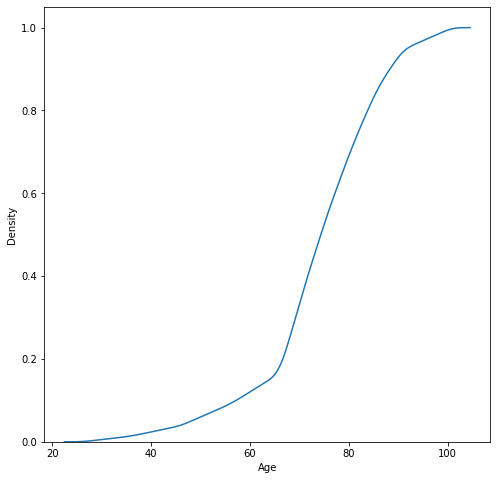

In [19]:
plt.figure(figsize=(8,8))
sns.kdeplot(
    data=Train_Beneficiarydata, x="Age",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.show()

<b>Observation : </b>

Only 15 to 16 percent population is less than 60. 

# Impatient

In [20]:
print('Shape of Train_impatient data :',Train_Inpatientdata.shape)

Shape of Train_impatient data : (40474, 30)


In [21]:
Train_Inpatientdata.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [22]:
Train_Inpatientdata.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [23]:
print("BeneID is unique : ", len(Train_Inpatientdata['BeneID'].unique()) == Train_Inpatientdata.shape[0])
print("ClaimID is unique : ", len(Train_Inpatientdata['ClaimID'].unique()) == Train_Inpatientdata.shape[0])
print("Provider is unique : ", len(Train_Inpatientdata['Provider'].unique()) == Train_Inpatientdata.shape[0])

BeneID is unique :  False
ClaimID is unique :  True
Provider is unique :  False


<b>Observation :</b> 

BeneID has relation many to one with ClaimID. Using Admission date and Discharge date we can calculate for how many days the patient was admitted.

In [24]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'])
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'])
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days.abs())+1

In [25]:
Train_Inpatientdata[['AdmissionDt','DischargeDt','AdmitForDays']]

,AdmissionDt,DischargeDt,AdmitForDays
0,2009-04-12,2009-04-18,7
1,2009-08-31,2009-09-02,3
2,2009-09-17,2009-09-20,4
3,2009-02-14,2009-02-22,9
4,2009-08-13,2009-08-30,18
...,...,...,...
40469,2009-09-28,2009-10-02,5
40470,2009-11-03,2009-11-06,4
40471,2009-11-18,2009-11-22,5
40472,2009-12-17,2009-12-18,2


In [26]:
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
print(Train_Inpatientdata.AdmitForDays.isnull().sum() )

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
0


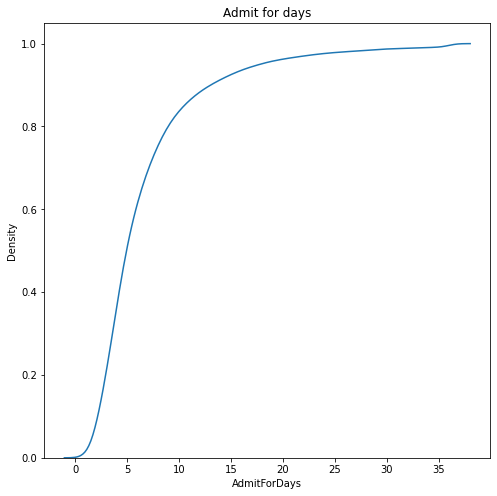

In [27]:
plt.figure(figsize=(8,8))
plt.title("Admit for days")
sns.kdeplot(
    data=Train_Inpatientdata, x="AdmitForDays",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.show()

# Outpatient

In [28]:
print('Shape of Train_outpatient data :',Train_Outpatientdata.shape)

Shape of Train_outpatient data : (517737, 27)


In [29]:
Train_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

# Merge


In [30]:
Train_patient_merge_id = [i for i in Train_Outpatientdata.columns if i in Train_Inpatientdata.columns]

# Merge Inpatient, Outpatient and beneficiary dataframe into a single patient dataset
Train_Patient_data = pd.merge(Train_Inpatientdata, Train_Outpatientdata,
                    left_on = Train_patient_merge_id,
                    right_on = Train_patient_merge_id,
                    how = 'outer').merge(Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [31]:
Train_Patient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Alive
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,Yes
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67.0,Yes
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9.0,1914-03-01,NaT,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,96.0,Yes
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaT,78900,0.0,NaT,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-03-01,NaT,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,96.0,Yes


In [32]:
print("BeneID is unique : ", len(Train_Patient_data['BeneID'].unique()) == Train_Patient_data.shape[0])
print("ClaimID is unique : ", len(Train_Patient_data['ClaimID'].unique()) == Train_Patient_data.shape[0])
print("Provider is unique : ", len(Train_Patient_data['Provider'].unique()) == Train_Patient_data.shape[0])

BeneID is unique :  False
ClaimID is unique :  True
Provider is unique :  False


# Analysis

In [33]:
print("Train Dataset Shape after merge:",Train_Patient_data.shape)

Train Dataset Shape after merge: (558211, 57)


In [34]:
Train_Patient_data.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [35]:
Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PHY390922,NaN,NaN
1,PHY318495,PHY318495,NaN
2,PHY372395,NaN,PHY324689
3,PHY369659,PHY392961,PHY349768
4,PHY379398,NaN,NaN
...,...,...,...
558206,PHY364188,PHY364188,PHY385752
558207,PHY423019,PHY332284,NaN
558208,PHY361063,NaN,NaN
558209,PHY403198,NaN,PHY419379


In [36]:
Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isnull(), 0, 1)

In [37]:
Train_Patient_data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,1,0,0
1,1,1,0
2,1,0,1
3,1,1,1
4,1,0,0
...,...,...,...
558206,1,1,1
558207,1,1,0
558208,1,0,0
558209,1,0,1


In [38]:
### Add a new variable in which it tells us how many total types of physicians used for the particular claim or patient.


Train_Patient_data['N_Types_Physicians'] = Train_Patient_data['AttendingPhysician'] +  Train_Patient_data['OperatingPhysician'] + Train_Patient_data['OtherPhysician']

Train_Patient_data['N_Types_Physicians']

0         1
1         2
2         2
3         3
4         1
         ..
558206    3
558207    2
558208    1
558209    2
558210    2
Name: N_Types_Physicians, Length: 558211, dtype: int64

In [39]:
Train_Patient_data['IsDiagnosisCode'] = np.where(Train_Patient_data.DiagnosisGroupCode.isnull(), 0, 1)
Train_Patient_data = Train_Patient_data.drop(['DiagnosisGroupCode'], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


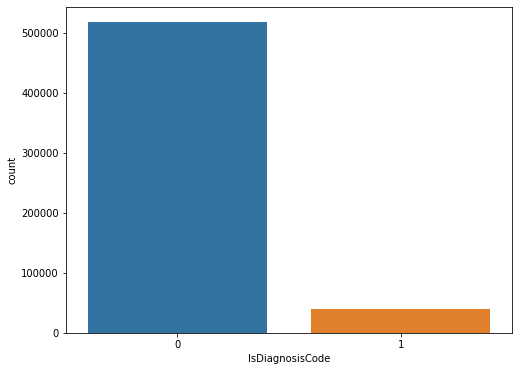

In [40]:
fig=plt.figure(figsize=(8,6))
sns.countplot(Train_Patient_data['IsDiagnosisCode'])

In [41]:
Train_Patient_data['DeductibleAmtPaid'].value_counts()

0.0       496701
1068.0     39575
100.0       4582
70.0        2420
60.0        2065
40.0        2045
80.0        2024
50.0        1969
20.0        1406
30.0        1336
90.0        1245
10.0        1203
200.0        734
876.0          2
865.0          2
897.0          2
886.0          1
Name: DeductibleAmtPaid, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


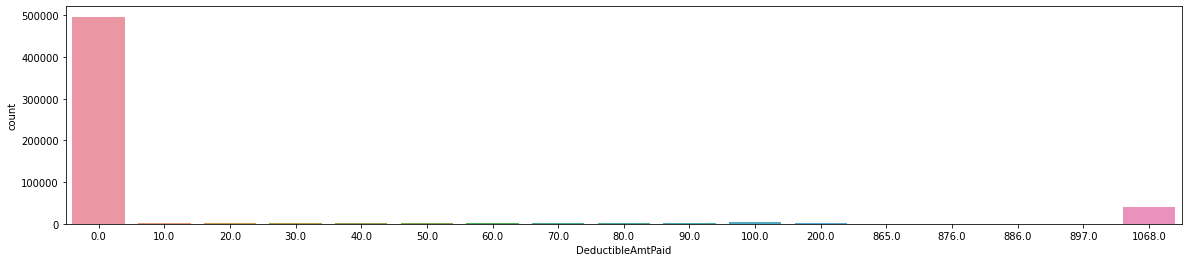

In [42]:
fig=plt.figure(figsize=(20,4))
sns.countplot(Train_Patient_data['DeductibleAmtPaid'])

In [43]:
Train_Patient_data['DeductibleAmtPaid'].fillna(0,inplace=True)
Train_Patient_data['IsDeductibleAmtPaid']=np.where(Train_Patient_data['DeductibleAmtPaid']==0,0,1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


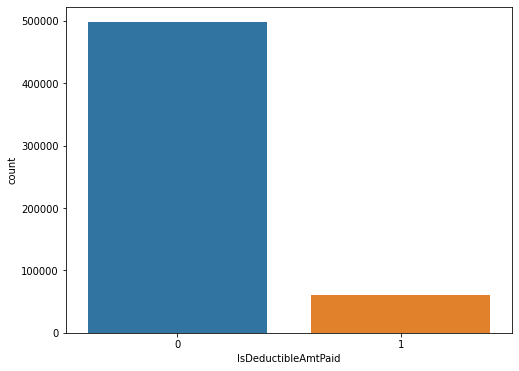

In [44]:
fig=plt.figure(figsize=(8,6))
sns.countplot(Train_Patient_data['IsDeductibleAmtPaid'])

In [45]:
# Replace all value with 0 as these all are the patients that didn't admit in the hospital

Train_Patient_data['AdmitForDays'].fillna(0,inplace=True)

In [46]:
## First we handle ClmProcedureCodes variables 

ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]
ClmProcedure_vars

['ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [47]:
Train_Patient_data[ClmProcedure_vars]

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,7092.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,331.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
558206,NaN,NaN,NaN,NaN,NaN,NaN
558207,NaN,NaN,NaN,NaN,NaN,NaN
558208,NaN,NaN,NaN,NaN,NaN,NaN
558209,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
Train_Patient_data[ClmProcedure_vars].isnull().sum()

ClmProcedureCode_1    534901
ClmProcedureCode_2    552721
ClmProcedureCode_3    557242
ClmProcedureCode_4    558093
ClmProcedureCode_5    558202
ClmProcedureCode_6    558211
dtype: int64

In [49]:
# This function helps us find the length of unique values in each row/record
def N_unique_values(df):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in df.values])

In [50]:
# We count the number of procedureCode for each claim and store these value in a new variable
Train_Patient_data['N_Procedure'] = N_unique_values(Train_Patient_data[ClmProcedure_vars])

## So from here we get to know that 534901 claims/records has 0 claim procedure codes, 17820 claims/records has 1 claimprocedurecodes and so on

Train_Patient_data['N_Procedure'].value_counts()

0    534901
1     17820
2      4521
3       851
4       109
5         9
Name: N_Procedure, dtype: int64

In [51]:
### Handling of 'ClmDiagnosisCode'

# We count the number of claims
ClmDiagnosisCode_vars = ['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]


ClmDiagnosisCode_vars

['ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10']

In [52]:
# We count the number of CLMDiagnosisCode for each claim and store these value in a new variable

Train_Patient_data['N_UniqueDiagnosis_Claims'] = N_unique_values(Train_Patient_data[ClmDiagnosisCode_vars])


Train_Patient_data['N_UniqueDiagnosis_Claims'].value_counts()

1     152275
2     132264
3      86573
4      57288
5      30338
10     22219
9      20821
6      19652
7      13770
8      11576
0       8319
11      3116
Name: N_UniqueDiagnosis_Claims, dtype: int64

## Gender

In [53]:
Train_Patient_data.Gender.value_counts()

0    323114
1    235097
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


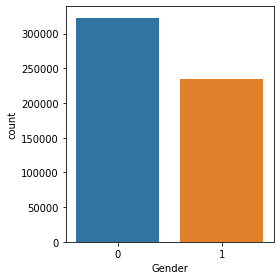

In [54]:
fig=plt.figure(figsize=(4,4))
sns.countplot(Train_Patient_data['Gender'])
fig.tight_layout()

## Race

In [55]:
Train_Patient_data['Race'].value_counts()

1    471036
2     55640
3     19715
5     11820
Name: Race, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


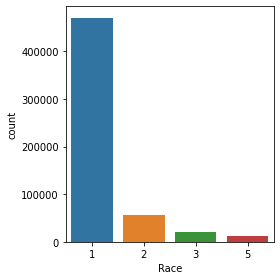

In [56]:
fig=plt.figure(figsize=(4,4))
sns.countplot(Train_Patient_data['Race'])
fig.tight_layout()

In [57]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(Train_Patient_data.Race.values.reshape(-1, 1)).toarray()

df_OneHot = pd.DataFrame(x, columns = ["Race_"+str(int(i)) for i in range(1,5)]) 
df_OneHot

Train_Patient_data = pd.concat([Train_Patient_data, df_OneHot], axis=1)


Train_Patient_data.drop(['Race'], axis=1,inplace=True)

## Reneal Disease Indicator

In [58]:
Train_Patient_data['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


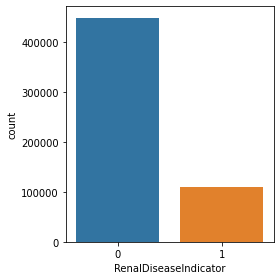

In [59]:
fig=plt.figure(figsize=(4,4))
sns.countplot(Train_Patient_data['RenalDiseaseIndicator'])
fig.tight_layout()

## State and County

In [60]:
#Find out which state has maximum count of claims

state_count=Train_Patient_data['State'].value_counts()
state_count=state_count[:20]
state_count

5     51350
10    39073
33    35024
45    34022
14    24417
39    24251
23    21343
36    21291
34    18905
11    17003
31    15940
49    14997
44    14418
15    14213
22    13624
26    12911
50    11740
21    11261
42    10491
18    10322
Name: State, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


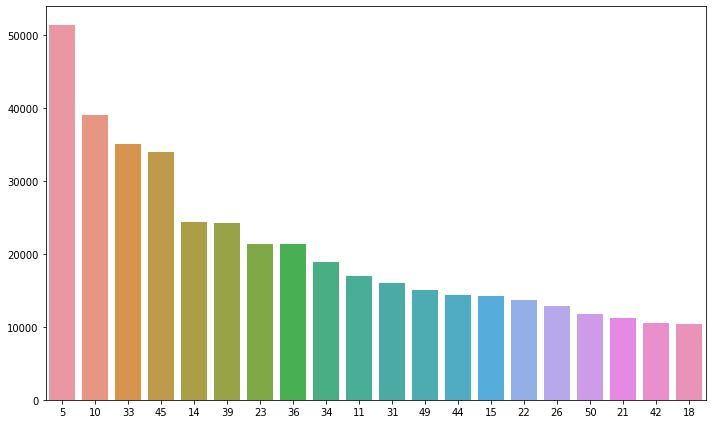

In [61]:
##Count plot of top 20 states which have maximum claims  

## from here we can see that state code 5 has maximum number of claims 

fig=plt.figure(figsize=(10,6))
sns.barplot(state_count.index,state_count.values,order=state_count.index)
fig.tight_layout()

In [62]:
#Find out which County has maximum count of claims
county_count=Train_Patient_data['County'].value_counts()
county_count=county_count[:20]
county_count

200    15957
10     13982
20     12632
470    12278
60     11995
400    11697
0      11481
90     11086
160    10533
150     9687
490     9487
590     9227
310     9027
141     8995
250     8384
130     8283
620     8170
290     8142
170     8017
50      7934
Name: County, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


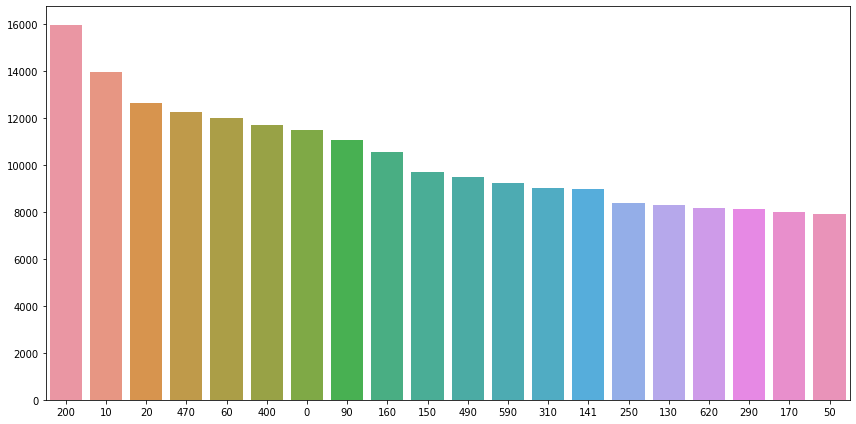

In [63]:
##Count plot of top 20 County which have maximum claims  

## from here we can see that County code 200 has maximum number of claims 


fig=plt.figure(figsize=(12,6))
sns.barplot(county_count.index,county_count.values,order=county_count.index)
fig.tight_layout()


## Chronic_cond

In [64]:
chronic_list = []
for i in Train_Patient_data.columns:
  if i.startswith("ChronicCond_"):
    chronic_list.append(i)

chronic_list

['ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

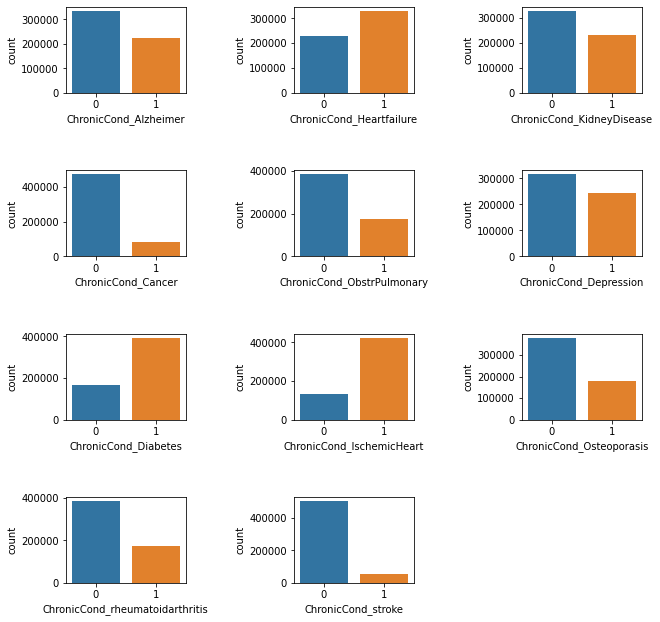

In [65]:
fig=plt.figure(figsize=(10,10))

for idx, col in enumerate(chronic_list):
    plt.subplot(4,3,idx+1)
    sns.countplot(Train_Patient_data.loc[:,col])
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.9)
plt.show()

## IPAnnualReimbursementAmt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


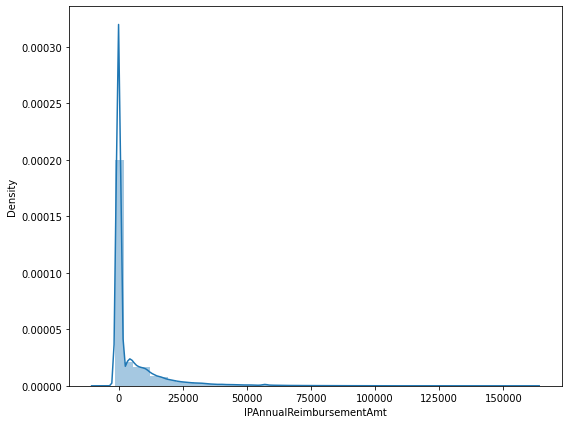

In [66]:
fig=plt.figure(figsize=(8,6))
sns.distplot(Train_Patient_data['IPAnnualReimbursementAmt'])
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


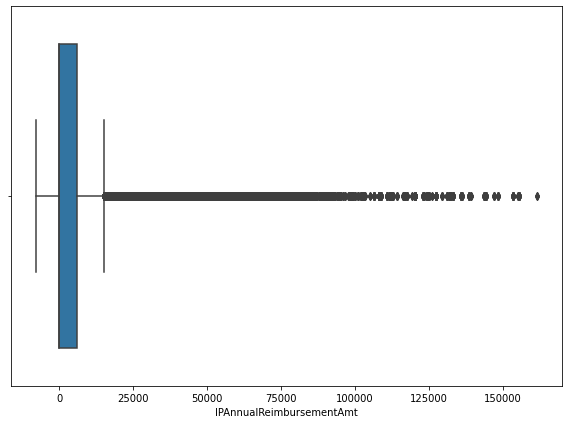

In [67]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['IPAnnualReimbursementAmt'])
fig.tight_layout()

## IPAnnualDeductibleAmt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


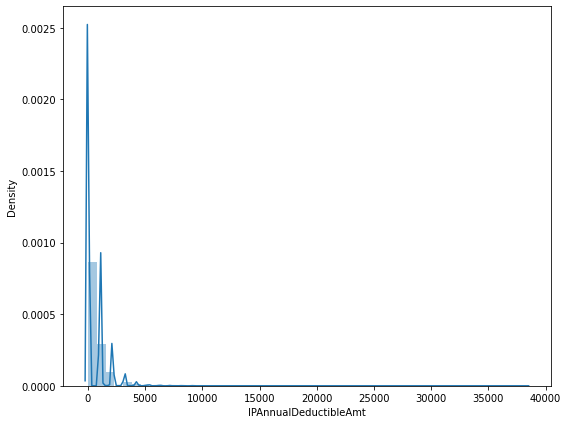

In [68]:
fig=plt.figure(figsize=(8,6))
sns.distplot(Train_Patient_data['IPAnnualDeductibleAmt'])
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


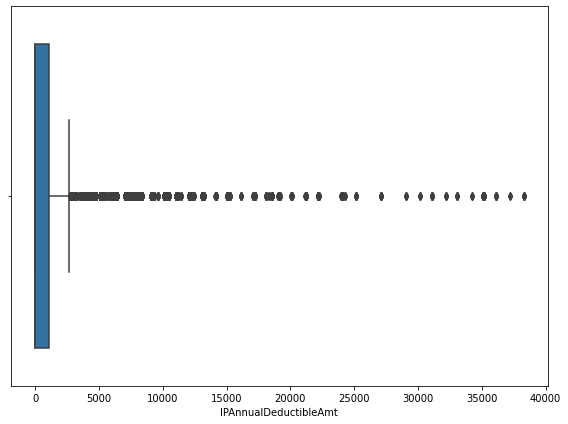

In [69]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['IPAnnualDeductibleAmt'])
fig.tight_layout()

## OPAnnualReimbursementAmt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


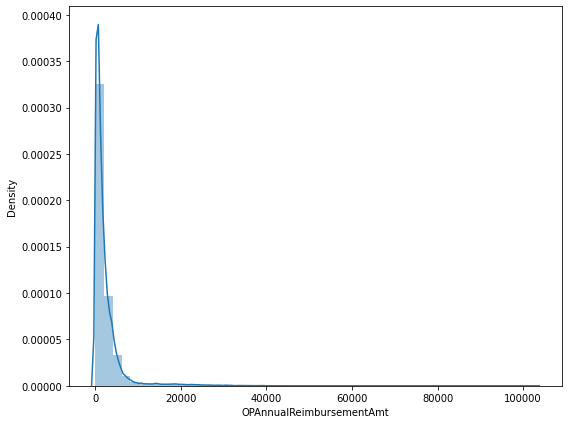

In [70]:
fig=plt.figure(figsize=(8,6))
sns.distplot(Train_Patient_data['OPAnnualReimbursementAmt'])
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


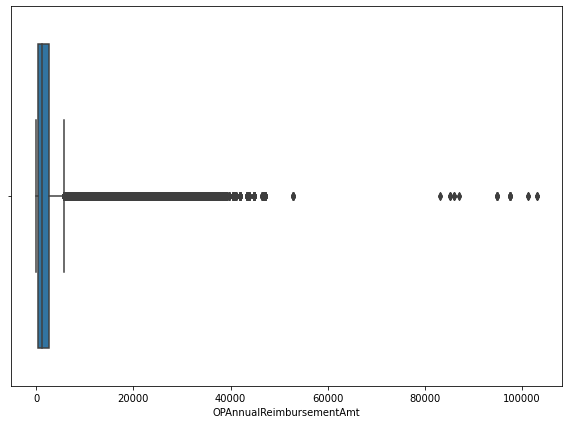

In [71]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['OPAnnualReimbursementAmt'])
fig.tight_layout()

## OPAnnualDeductibleAmt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


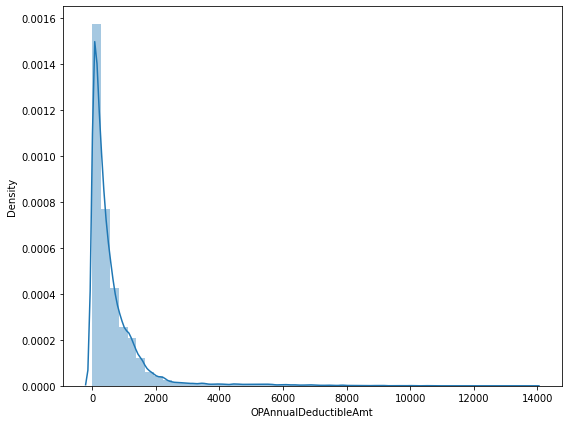

In [72]:
fig=plt.figure(figsize=(8,6))
sns.distplot(Train_Patient_data['OPAnnualDeductibleAmt'])
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


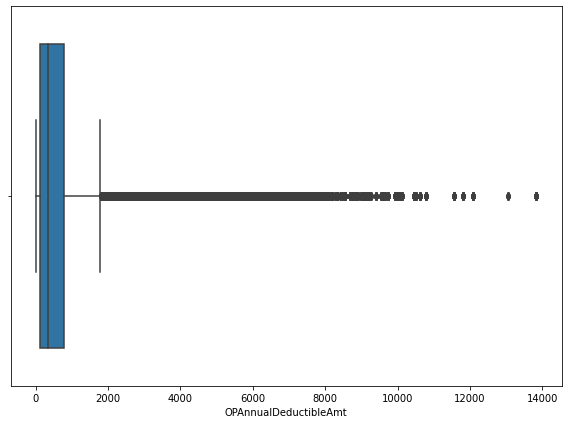

In [73]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(Train_Patient_data['OPAnnualDeductibleAmt'])
fig.tight_layout()

# Final df

In [74]:
Train_Count = Train_Patient_data[['BeneID', 'ClaimID']].groupby(Train_Patient_data['Provider']).nunique().reset_index()
Train_Count.rename(columns={'BeneID':'BeneID_count','ClaimID':'ClaimID_count'},inplace=True)

In [75]:
Train_Data_Sum = Train_Patient_data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                     'AttendingPhysician','OperatingPhysician','OtherPhysician','AdmitForDays',
                                                    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer', 
                                                    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
                                                   'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',   
                                                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                    'ChronicCond_stroke', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Alive',
                                                    'N_Types_Physicians','IsDiagnosisCode', 'N_Procedure', 'N_UniqueDiagnosis_Claims']].sum()

In [76]:
Train_Data_Mean=round(Train_Patient_data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                                            'Age']].mean())

In [77]:
Train_df=pd.merge(Train_Count,Train_Data_Sum,on='Provider',how='left').\
                merge(Train_Data_Mean,on='Provider',how='left').\
                merge(Train,on='Provider',how='left')

In [78]:
Train_df

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_Cancer,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,N_Types_Physicians,IsDiagnosisCode,N_Procedure,N_UniqueDiagnosis_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340.0,25,5,10,30.0,15,19,5,17,10,9,21,23,6,8,6,440150,22428,65380,11598,40,5,3,91,12.0,12.0,79.0,No
1,PRV51003,117,132,605670,66286.0,132,45,25,382.0,56,80,10,64,41,54,100,112,33,38,12,999000,122948,353520,97300,202,62,48,761,12.0,12.0,70.0,Yes
2,PRV51004,138,149,52170,310.0,149,27,63,0.0,64,88,16,50,41,63,105,108,49,46,17,648430,64808,327040,92790,239,0,0,410,12.0,12.0,72.0,No
3,PRV51005,495,1165,280910,3700.0,1163,222,478,0.0,426,680,165,507,295,485,799,895,344,331,124,4221950,441724,2457840,741323,1863,0,0,3246,12.0,12.0,70.0,Yes
4,PRV51007,58,72,33710,3264.0,72,12,26,19.0,26,40,12,22,16,29,49,51,21,22,12,219600,32040,124540,33820,110,3,1,231,12.0,12.0,69.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,24,28,10640,130.0,28,1,12,0.0,14,20,4,15,11,9,20,28,13,9,4,110940,12816,90770,24830,41,0,0,61,12.0,12.0,74.0,No
5406,PRV57760,9,22,4770,0.0,22,6,9,0.0,3,11,0,2,2,7,18,22,11,1,0,61280,9612,32840,17720,37,0,0,59,12.0,12.0,61.0,No
5407,PRV57761,67,82,18470,370.0,82,14,36,0.0,36,56,14,40,30,38,55,62,32,24,10,576180,48060,240130,58000,132,0,0,235,12.0,12.0,72.0,No
5408,PRV57762,1,1,1900,0.0,1,0,0,0.0,0,0,1,1,1,0,1,1,0,0,0,15000,1068,2540,400,1,0,0,2,12.0,12.0,68.0,No


In [79]:
Train_df.isnull().sum()

Provider                           0
BeneID_count                       0
ClaimID_count                      0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
AdmitForDays                       0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_Cancer                 0
ChronicCond_KidneyDisease          0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
N_Types_Physicians                 0
IsDiagnosisCode                    0
N_Procedure                        0
N

In [80]:
#In Train Dataset Target variable PotentialFraud has value in category i.e "Yes" and "No" need to replace with 1 and 0.

Train_df['PotentialFraud']=np.where(Train_df.PotentialFraud == "Yes", int(1), int(0))

# Final data analysis

In [81]:
Train_df.head()

,Provider,BeneID_count,ClaimID_count,InscClaimAmtReimbursed,DeductibleAmtPaid,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmitForDays,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_Cancer,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,N_Types_Physicians,IsDiagnosisCode,N_Procedure,N_UniqueDiagnosis_Claims,NoOfMonths_PartACov,NoOfMonths_PartBCov,Age,PotentialFraud
0,PRV51001,24,25,104640,5340.0,25,5,10,30.0,15,19,5,17,10,9,21,23,6,8,6,440150,22428,65380,11598,40,5,3,91,12.0,12.0,79.0,0
1,PRV51003,117,132,605670,66286.0,132,45,25,382.0,56,80,10,64,41,54,100,112,33,38,12,999000,122948,353520,97300,202,62,48,761,12.0,12.0,70.0,1
2,PRV51004,138,149,52170,310.0,149,27,63,0.0,64,88,16,50,41,63,105,108,49,46,17,648430,64808,327040,92790,239,0,0,410,12.0,12.0,72.0,0
3,PRV51005,495,1165,280910,3700.0,1163,222,478,0.0,426,680,165,507,295,485,799,895,344,331,124,4221950,441724,2457840,741323,1863,0,0,3246,12.0,12.0,70.0,1
4,PRV51007,58,72,33710,3264.0,72,12,26,19.0,26,40,12,22,16,29,49,51,21,22,12,219600,32040,124540,33820,110,3,1,231,12.0,12.0,69.0,0


In [82]:
print("Size of dataset : ", Train_df.shape)

Size of dataset :  (5410, 32)


In [83]:
Train_df.dtypes

Provider                            object
BeneID_count                         int64
ClaimID_count                        int64
InscClaimAmtReimbursed               int64
DeductibleAmtPaid                  float64
AttendingPhysician                   int64
OperatingPhysician                   int64
OtherPhysician                       int64
AdmitForDays                       float64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_Cancer                   int64
ChronicCond_KidneyDisease            int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualReimbursementAmt             int64
OPAnnualDed

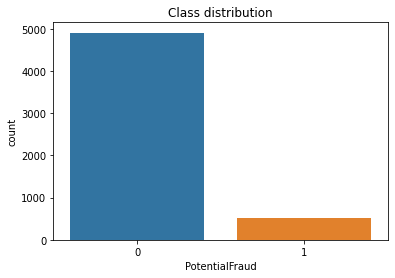

In [84]:
plt.figure()
plt.title("Class distribution")
sns.countplot(data=Train_df, x='PotentialFraud')
plt.show()

<b>Observation : </b>

This dataset is heavily imbalanced. For this reason we have to use some metrics like f1score, precision or recall. Another way is to use oversampling methods.

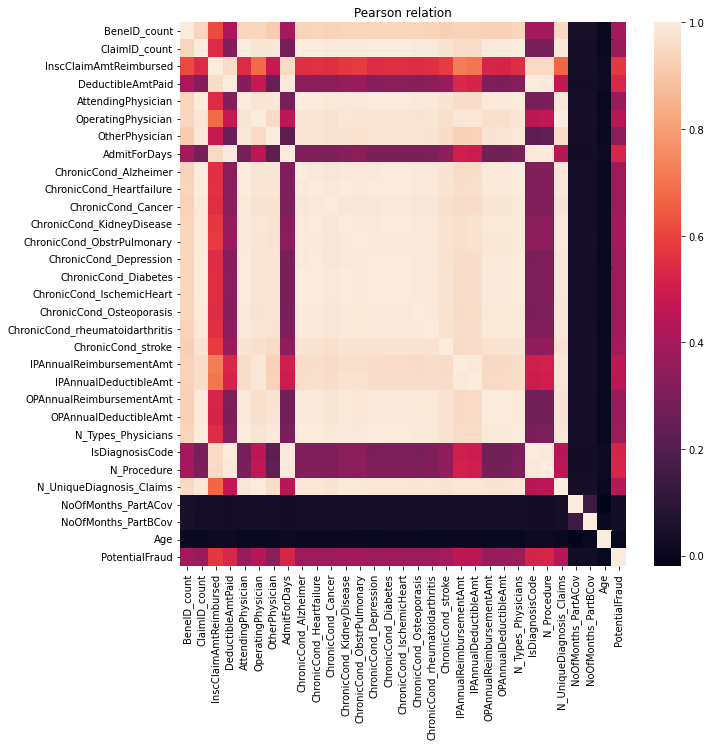

In [93]:
plt.figure(figsize=(10,10))
plt.title("Pearson relation")
sns.heatmap(Train_df.corr())
plt.show()

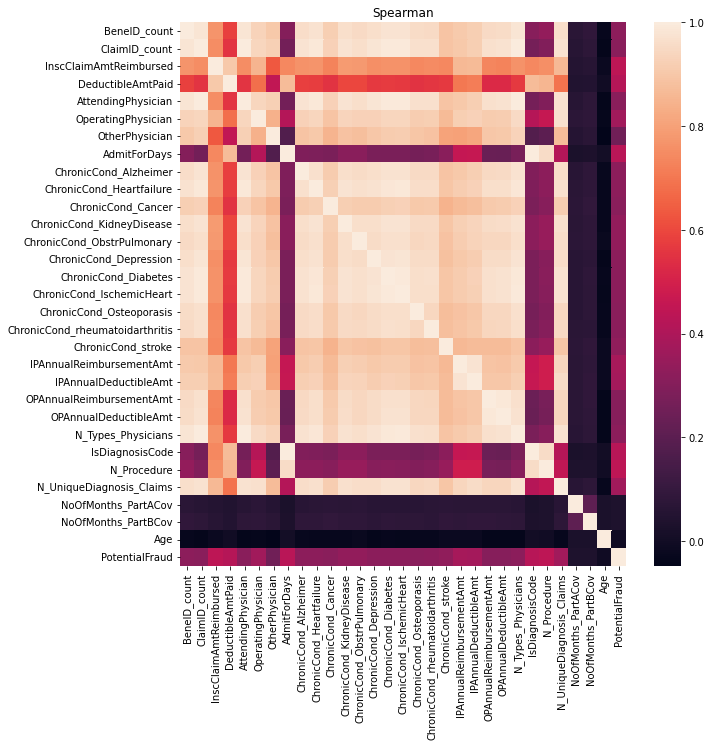

In [94]:
plt.figure(figsize=(10,10))
plt.title("Spearman")
sns.heatmap(Train_df.corr(method='spearman'))
plt.show()

<b>Observation : </b>

One thing is very clear that features like PartA, PartB conv and age are not highly correalted. But we will use them and will use LIME or SHAP analysis to determine.

<Figure size 720x720 with 0 Axes>

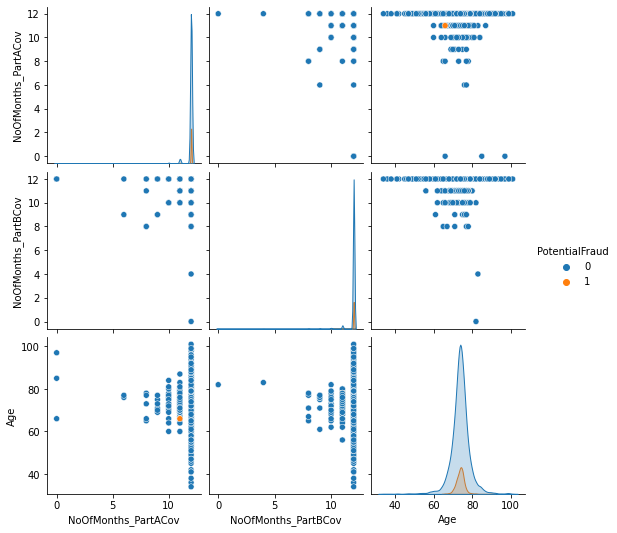

In [87]:
plt.figure(figsize=(10,10))
# plt.title("Spearman")
sns.pairplot(data=Train_df[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Age', 'PotentialFraud']], hue='PotentialFraud')
plt.show()

<Figure size 720x720 with 0 Axes>

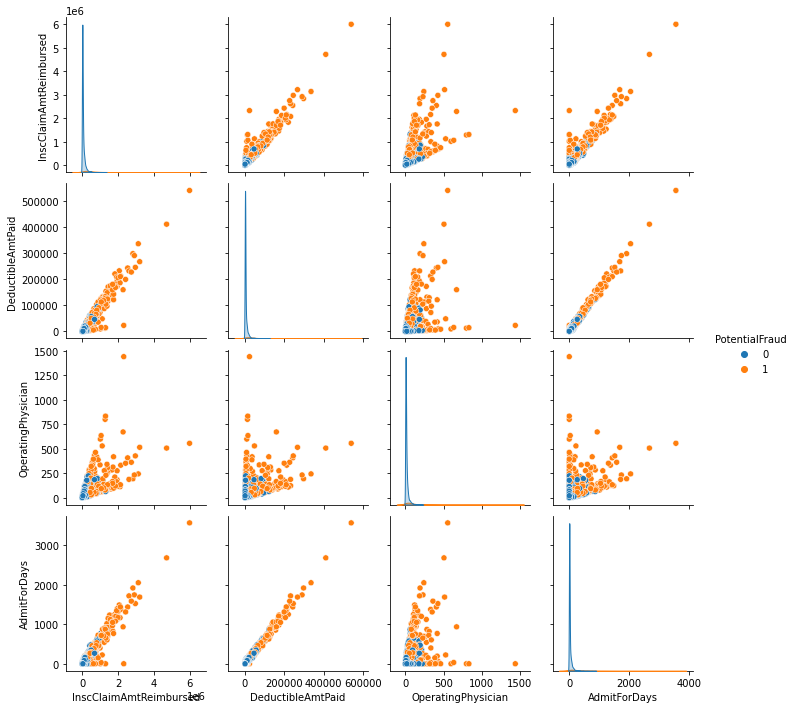

In [88]:
plt.figure(figsize=(10,10))
# plt.title("Spearman")
sns.pairplot(data=Train_df[['InscClaimAmtReimbursed','DeductibleAmtPaid','OperatingPhysician','AdmitForDays','PotentialFraud']], hue='PotentialFraud')
plt.show()

<b>Observation : </b>

There are features which were not correlated when we checked the heatmap, but here it seems we can seperate them a bit.

## PCA

<Figure size 1296x1296 with 0 Axes>

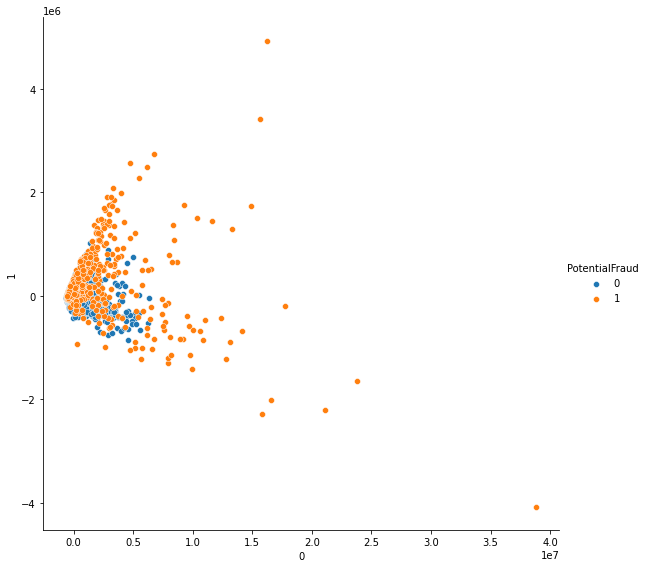

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(Train_df.drop(['PotentialFraud', 'Provider'], axis=1), Train_df['PotentialFraud'])
plt.figure(figsize=(18,18))
sns.FacetGrid(data=pd.concat([pd.DataFrame(x),pd.DataFrame(Train_df['PotentialFraud'])], axis=1), hue='PotentialFraud',height=8).map(sns.scatterplot, 0, 1).add_legend()
plt.show()

In [90]:
import plotly.express as px

pca = PCA(n_components=3)
x = pca.fit_transform(Train_df.drop(['PotentialFraud', 'Provider'], axis=1), Train_df['PotentialFraud'])

fig = px.scatter_3d(pd.concat([pd.DataFrame(x),pd.DataFrame(Train_df['PotentialFraud'])], axis=1), x=0, y=1, z=2,
              color='PotentialFraud')

fig.show()

<b>Observation : </b>

By using PCA we can see that we can seperate fraud and not Fraud.

## TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<Figure size 1296x1296 with 0 Axes>

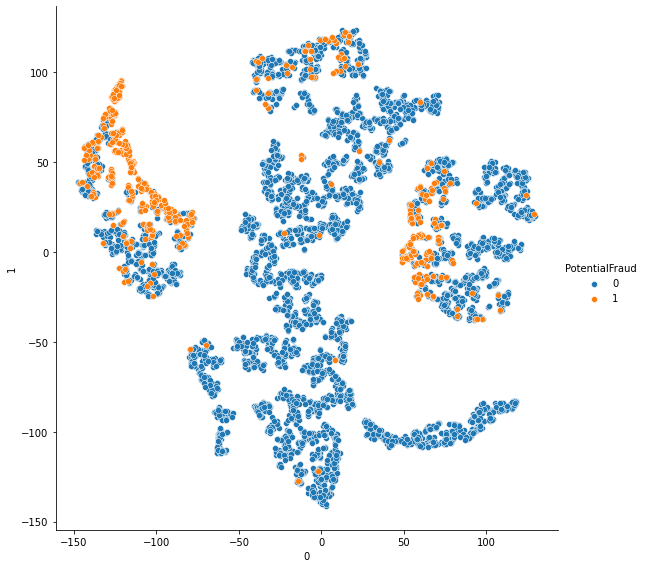

In [91]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1, n_iter=8000, perplexity=19)
x = tsne.fit_transform(Train_df.drop(['PotentialFraud', 'Provider'], axis=1), Train_df['PotentialFraud'])
plt.figure(figsize=(18,18))
sns.FacetGrid(data=pd.concat([pd.DataFrame(x),pd.DataFrame(Train_df['PotentialFraud'])], axis=1), hue='PotentialFraud',height=8).map(sns.scatterplot, 0, 1).add_legend()
plt.show()

In [92]:
import plotly.express as px

tsne = TSNE(n_components=3,  n_jobs=-1, n_iter=8000)
x = tsne.fit_transform(Train_df.drop(['PotentialFraud', 'Provider'], axis=1), Train_df['PotentialFraud'])

fig = px.scatter_3d(pd.concat([pd.DataFrame(x),pd.DataFrame(Train_df['PotentialFraud'])], axis=1), x=0, y=1, z=2,
              color='PotentialFraud')

fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

